# Forecasting recovery rates for debt collection agency: Avance BPO



A non-performing loan (NPL) is a loan that is in default due to the fact that the borrower has not made the scheduled payments for a specified period.

Non-performing loans are purchased from the bank by a debt collection agency which must prioritize which users to prompt first. One of the most important factors regarding this decision is the recovery rate: the percentage of exposure that can be recovered from each borrower through the debt collection process. The recovery rates achievable by the debt collector are unknown at the time of purchase of the portfolio and need to be predicted. 

Based on the information given by the bank, the objective of this model is to predict the recovery rates on non-performing loans  (NLP) using a private database from a Colombian debt collection agency called Avance BPO.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Datasets

In [600]:
# df = pd.read_excel('datos_avance.xlxs', sheet_name=None)
df = pd.read_excel('datos_avance.xlsx') 
df.head()

,FechaCaptura,Credito,FechaAPagar,VRCancelar,PuntoPago,TipoPago,Asesor,VrTotalObligacion,VrTotalNegociado,Condonacion,TipoPago2,Cuotas,VrCuota1,VrOtrasCuotas,CuotaNumero,Estado,FechaPago
0,2016-11-08,904141001352,2016-11-30,100000,CDS o Efecty,Pago Parcial,Si,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
1,2016-11-23,904141001295,2016-12-21,260000,Oficina Fundaci¢n de la Mujer,Pago Parcial con Condonaci¢n,Si,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
2,2016-11-28,904141000816,2016-12-15,844000,Oficina Fundaci¢n de la Mujer,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
3,2016-11-19,904141000465,2016-11-30,75000,CDS o Efecty,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
4,2016-11-09,904141000343,2016-11-30,55000,CDS o Efecty,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01


In [5]:
dfname=pd.ExcelFile('datos_avance.xlsx')
print(dfname.sheet_names)

['acuerdos', 'payment_params', 'pagos', 'asignacion_fdem', 'resumen_creditos', 'gestiones_2022']


### Pagos Dataset: For extracting Target Value

In [3]:
df_pagos =pd.read_excel(f'datos_avance.xlsx',sheet_name='pagos')
df_pagos.head()

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,MORA,PAGOSOTROS,TotalCancelado,VRgoech,CONDCAPITAL,CONDINTERES,CONDMORA,DiasMoraPago,Reverso,Concepto
0,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101101002728,Castigado,321631,2032,0,0,2016-10-18,...,0,10556,332187,321631,0,0,594634,2050,NaN,NaN
1,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101104101267,Castigado,149159,2142,0,0,2016-10-31,...,0,4182,153341,149159,0,3498,356515,2172,NaN,NaN
2,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101131041847,Castigado,384108,490,0,0,2016-10-20,...,0,9799,393907,384108,0,20307,233846,510,NaN,NaN
3,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028221,Castigado,291780,706,0,0,2016-10-21,...,0,20420,312200,291780,0,30678,226165,727,NaN,NaN
4,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028298,Castigado,1363613,803,1322611,803,2016-10-18,...,0,12549,100000,87451,0,0,52487,821,NaN,NaN


In [ ]:
df_out2.loc[df_out2['Credito'] ==108171029529]

In [602]:
# df_acuerdos =pd.read_excel(f'datos_avance.xlsx',sheet_name='acuerdos')
# df_acuerdos.head()

In [5]:
# df_acuerdos.to_csv("acuerdos.csv",index=False)

In [603]:
# df_payment_params =pd.read_excel(f'datos_avance.xlsx',sheet_name='payment_params')
# df_payment_params.head()

In [8]:
# df_payment_params.to_csv("payment_params.csv",index=False)

In [10]:
# df_pagos.to_csv("pagos.csv",index=False)

### Bank NPL Dataset 

In [4]:
df_asignacion_fdem =pd.read_excel(f'datos_avance.xlsx',sheet_name='asignacion_fdem')
df_asignacion_fdem.head()

,obligacion,Titular,agencia,tipo,primera_asignacion,fecha_asignacion,fecha_desasignacion,nombre,ciudad,tel_casa,...,inter_corri,inter_mora,hyc,seguro,iva,valor_cuota,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente
0,201917264,1,201,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,SALAZAR ECHAVARRIA CARMEN ADRIANA,CUCUTA,75702725,...,29994,2397521,0,0,0,0,8,2,6,0
1,10191142053,2,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,GONZALEZ GONZALEZ EFRAIN,BUCARAMANGA,76731342,...,0,118354,0,0,0,0,12,11,1,0
2,10191144858,3,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,LANDAZABAL SANTANDER MILENA,BUCARAMANGA,76417311,...,10928,1297810,0,0,0,0,8,4,4,0
3,10191146050,4,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,ESTUPIÑAN LOPEZ ARMANDO,BUCARAMANGA,76710070,...,20805,1987240,0,0,0,0,8,3,5,0
4,10191150337,5,101,MANTENIDO,2016-10-01,2016-10-01,2020-07-03 00:00:00,OSMA MARTHA ADELINA,BUCARAMANGA,76732213,...,66677,4464796,2125,0,340,0,14,6,8,0


In [18]:
df_asignacion_fdem.rename({'obligacion':'Credito'},axis = 1, inplace = True)

In [19]:
df_asignacion_fdem.columns

Index(['Credito', 'Titular', 'agencia', 'tipo', 'primera_asignacion',
       'fecha_asignacion', 'fecha_desasignacion', 'nombre', 'ciudad',
       'tel_casa', 'tel_negocio', 'celular', 'cedula_conyuge',
       'nombre_conyuge', 'tel_casa_conyuge', 'tel_negocio_conyuge',
       'celular_conyuge', 'nombre_garante', 'cedula_garante',
       'tel_casa_garante', 'tel_negocio_garante', 'celular_garante',
       'producto', 'dias_atraso', 'fecha_atraso', 'fecha_desembolso',
       'fecha_castigo', 'grupo_castigo', 'ultimo_pago', 'monto', 'capital',
       'inter_corri', 'inter_mora', 'hyc', 'seguro', 'iva', 'valor_cuota',
       'nro_cuotas_atrasadas', 'cuotas_canceladas', 'cuotas_vencidas',
       'vigente'],
      dtype='object')

In [11]:
df_asignacion_fdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165200 entries, 0 to 165199
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   obligacion            165200 non-null  int64         
 1   Titular               165200 non-null  int64         
 2   agencia               165200 non-null  int64         
 3   tipo                  165200 non-null  object        
 4   primera_asignacion    165200 non-null  datetime64[ns]
 5   fecha_asignacion      165200 non-null  datetime64[ns]
 6   fecha_desasignacion   165200 non-null  object        
 7   nombre                165200 non-null  object        
 8   ciudad                165200 non-null  object        
 9   tel_casa              165200 non-null  int64         
 10  tel_negocio           165200 non-null  int64         
 11  celular               165200 non-null  int64         
 12  cedula_conyuge        165200 non-null  int64         
 13 

In [273]:
df_asignacion_fdem.nunique()

Credito                 165200
Titular                 134933
agencia                    258
tipo                        21
primera_asignacion          27
fecha_asignacion            26
fecha_desasignacion         37
nombre                  134889
ciudad                     917
tel_casa                 27086
tel_negocio              67789
celular                 126751
cedula_conyuge           59920
nombre_conyuge           59913
tel_casa_conyuge          9392
tel_negocio_conyuge       8701
celular_conyuge          53610
nombre_garante           48559
cedula_garante           48668
tel_casa_garante          8717
tel_negocio_garante      10224
celular_garante          42677
producto                   111
dias_atraso               4043
fecha_atraso              5758
fecha_desembolso          4418
fecha_castigo               73
grupo_castigo               64
ultimo_pago               4437
monto                    36795
capital                 125973
inter_corri             105073
inter_mo

In [12]:
# df_asignacion_fdem.to_csv("asignacion_fdem.csv",index=False)

In [604]:
# df_resumen_creditos =pd.read_excel(f'datos_avance.xlsx',sheet_name='resumen_creditos')
# df_resumen_creditos.head()


#### Rate of Recovery (Test #1)


In [5]:
df_pagos.head(5)

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,MORA,PAGOSOTROS,TotalCancelado,VRgoech,CONDCAPITAL,CONDINTERES,CONDMORA,DiasMoraPago,Reverso,Concepto
0,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101101002728,Castigado,321631,2032,0,0,2016-10-18,...,0,10556,332187,321631,0,0,594634,2050,NaN,NaN
1,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101104101267,Castigado,149159,2142,0,0,2016-10-31,...,0,4182,153341,149159,0,3498,356515,2172,NaN,NaN
2,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101131041847,Castigado,384108,490,0,0,2016-10-20,...,0,9799,393907,384108,0,20307,233846,510,NaN,NaN
3,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028221,Castigado,291780,706,0,0,2016-10-21,...,0,20420,312200,291780,0,30678,226165,727,NaN,NaN
4,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028298,Castigado,1363613,803,1322611,803,2016-10-18,...,0,12549,100000,87451,0,0,52487,821,NaN,NaN


In [274]:
df_pagos.nunique()

MesCargue              71
Codigo                267
Agencia               529
Credito             28870
Estado                  5
SaldoFindeMes       80968
DiasMoraFindeMes     2827
SaldoActual         64306
DiasmoraActual       2789
FechaValor           1743
FechaPago            1716
RangoCuotas             6
Cuotas               2811
ValorCuota          15922
TipoPago                3
CAPITAL             69489
INTERES             33970
MORA                21099
PAGOSOTROS          31796
TotalCancelado      12794
VRgoech             61958
CONDCAPITAL          1777
CONDINTERES         10964
CONDMORA            62106
DiasMoraPago         4318
Reverso              2124
Concepto                5
dtype: int64

In [8]:
df_pagos['SaldoFindeMes'].isna().value_counts()

False    101214
Name: SaldoFindeMes, dtype: int64

In [7]:
isinstance(df_pagos, pd.DataFrame)

True

In [9]:
df_pagos['SaldoFindeMes'] = df_pagos['SaldoFindeMes'].replace(0, np.nan)



In [10]:
df_pagos['SaldoFindeMes'].isna().value_counts()

False    101172
True         42
Name: SaldoFindeMes, dtype: int64

In [11]:
df_pagos_cleaned = df_pagos.dropna(subset = ["SaldoFindeMes"]) 

In [12]:
df_pagos_cleaned["SaldoFindeMes"].isna().value_counts()

False    101172
Name: SaldoFindeMes, dtype: int64

In [13]:
df_pagos_cleaned['rate'] = df_pagos_cleaned['TotalCancelado']/df_pagos_cleaned['SaldoFindeMes']

/tmp/ipykernel_769/3106164577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pagos_cleaned['rate'] = df_pagos_cleaned['TotalCancelado']/df_pagos_cleaned['SaldoFindeMes']


In [14]:
df_pagos_cleaned.head()

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,PAGOSOTROS,TotalCancelado,VRgoech,CONDCAPITAL,CONDINTERES,CONDMORA,DiasMoraPago,Reverso,Concepto,rate
0,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101101002728,Castigado,321631.0,2032,0,0,2016-10-18,...,10556,332187,321631,0,0,594634,2050,NaN,NaN,1.032820
1,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101104101267,Castigado,149159.0,2142,0,0,2016-10-31,...,4182,153341,149159,0,3498,356515,2172,NaN,NaN,1.028037
2,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101131041847,Castigado,384108.0,490,0,0,2016-10-20,...,9799,393907,384108,0,20307,233846,510,NaN,NaN,1.025511
3,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028221,Castigado,291780.0,706,0,0,2016-10-21,...,20420,312200,291780,0,30678,226165,727,NaN,NaN,1.069984
4,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028298,Castigado,1363613.0,803,1322611,803,2016-10-18,...,12549,100000,87451,0,0,52487,821,NaN,NaN,0.073335


In [15]:
df_pagos_cleaned['SaldoFindeMes'].info()

<class 'pandas.core.series.Series'>
Int64Index: 101172 entries, 0 to 101213
Series name: SaldoFindeMes
Non-Null Count   Dtype  
--------------   -----  
101172 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [16]:
df_pagos_cleaned['rate'].describe()

count    101172.000000
mean          0.440709
std           1.849641
min           0.000002
25%           0.103865
50%           0.221439
75%           0.591595
max         518.687059
Name: rate, dtype: float64

## Merging Dataset

### Merging Sum of Total Cancelado with Asignacion FDEM

From the Pagos Dataset, group by loan Id and sum all the payments made to that loan. Then merge it with the Bank dataset. 

In [605]:
df_total = df_pagos.groupby('Credito')['TotalCancelado'].sum()

In [732]:
df_saldo = df_pagos.groupby('Credito')['SaldoFindeMes'].max()
df_saldo.head()

Credito
10191138571    149818.0
10191147413    181360.0
10691417316    102205.0
10691418568    245626.0
10691419227    261656.0
Name: SaldoFindeMes, dtype: float64

In [606]:
df_total.head()

Credito
10191138571    310000
10191147413    506660
10691417316    104829
10691418568    256732
10691419227    500000
Name: TotalCancelado, dtype: int64

In [657]:
df_merge2 = df_asignacion_fdem.merge(df_total, on='Credito', how='inner')

In [730]:
df_merge2.head()


,Credito,Titular,agencia,tipo,primera_asignacion,fecha_asignacion,fecha_desasignacion,nombre,ciudad,tel_casa,...,inter_mora,hyc,seguro,iva,valor_cuota,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado
0,101104101421,95,101,MANTENIDO,2016-10-01,2016-10-01,\N,ZAPATA JIMENEZ NATHALI,BUCARAMANGA,3175220817,...,28001,0,69,0,79913,12,9,3,0,695000
1,101111013583,140,101,MANTENIDO,2016-10-01,2016-10-01,\N,FUENTES CARLOS EDUARDO,FLORIDABLANCA,76190026,...,207345,22601,437,4292,91658,24,8,6,1,320000
2,101111014610,153,101,MANTENIDO,2016-10-01,2016-10-01,2020-07-03 00:00:00,GARCIA RODRIGUEZ FRANKLIN GEOVANNY,FLORIDABLANCA,76196665,...,1774888,0,622,0,99815,8,2,6,0,1300000
3,101111015376,161,101,MANTENIDO,2016-10-01,2016-10-01,2019-08-31 00:00:00,GOMEZ LUIS RAMON,BUCARAMANGA,0,...,3448115,71755,1828,13636,132996,14,4,10,0,1886000
4,101111016438,180,101,MANTENIDO,2016-10-01,2016-10-01,2020-07-03 00:00:00,GONZALEZ RONDON MARIA DOLORES,BUCARAMANGA,76701592,...,153754,36059,825,6852,174804,15,9,6,0,150000


In [622]:
df_merge2.to_csv("merged.csv",index=False)

In [733]:
df_merge3 = df_merge2.merge(df_saldo, on='Credito', how='inner')

In [735]:
df_merge3.to_csv("merged3.csv",index=False)

In [659]:
df_features2 = df_merge2[['Credito','nombre_conyuge','nombre_garante', 'dias_atraso', 'monto', 'nro_cuotas_atrasadas', 'cuotas_canceladas', 'cuotas_vencidas','vigente','TotalCancelado']]
df_features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 15288
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Credito               15289 non-null  int64 
 1   nombre_conyuge        6355 non-null   object
 2   nombre_garante        6497 non-null   object
 3   dias_atraso           15289 non-null  int64 
 4   monto                 15289 non-null  int64 
 5   nro_cuotas_atrasadas  15289 non-null  int64 
 6   cuotas_canceladas     15289 non-null  int64 
 7   cuotas_vencidas       15289 non-null  int64 
 8   vigente               15289 non-null  int64 
 9   TotalCancelado        15289 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.3+ MB


In [660]:
df_features2.head()

,Credito,nombre_conyuge,nombre_garante,dias_atraso,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado
0,101104101421,AMAYA VELASQUEZ CESAR AUGUSTO,NaN,3157,820000,12,9,3,0,695000
1,101111013583,GARCIA SUAREZ DIANA HELENA,NaN,2117,1038863,24,8,6,1,320000
2,101111014610,NaN,GARCIA RODRIGUEZ ELIZABETH,2727,700000,8,2,6,0,1300000
3,101111015376,NaN,JAIMES LIZARAZO DIEGO,2635,1500000,14,4,10,0,1886000
4,101111016438,MORENO DIAZ RAUL,NaN,2449,2030000,15,9,6,0,150000


###### RR = Total Cancelado / MAX(SaldoFindeMes)

In [661]:
df_features3 = df_features2.merge(df_saldo, on='Credito', how='inner')

In [662]:
df_features3.head()

,Credito,nombre_conyuge,nombre_garante,dias_atraso,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado,SaldoFindeMes
0,101104101421,AMAYA VELASQUEZ CESAR AUGUSTO,NaN,3157,820000,12,9,3,0,695000,760541.0
1,101111013583,GARCIA SUAREZ DIANA HELENA,NaN,2117,1038863,24,8,6,1,320000,715299.0
2,101111014610,NaN,GARCIA RODRIGUEZ ELIZABETH,2727,700000,8,2,6,0,1300000,540311.0
3,101111015376,NaN,JAIMES LIZARAZO DIEGO,2635,1500000,14,4,10,0,1886000,1133161.0
4,101111016438,MORENO DIAZ RAUL,NaN,2449,2030000,15,9,6,0,150000,928039.0


## Data Preprocessing

### Conyuge (Spouse)


Determinar si usuarios tienen conyuge o en caso contrario calificarlos como solteros

In [665]:
df_features3['nombre_conyuge'].sample(10)

5741            OCAMPO  AVILA SUGEY MILAGRO
4509           OSORIO   CARVAJAL ANA  LUCIA
9699                                    NaN
1527            DIAZ   SANTAMARIA  YOLANDA 
11111                                   NaN
9102                                    NaN
14599         BEDOYA  PINZON HENRY FERNANDO
8473                                    NaN
9584      BARRANTES  MAYORGA MIGUEL ALFONSO
5591     SOLANO  HASSELBRINK RAFAEL ALFREDO
Name: nombre_conyuge, dtype: object

In [666]:
df_features3['nombre_conyuge'].replace(to_replace=r"[\w'-]+", value='Casado', regex = True, inplace=True)

In [667]:
df_features3['nombre_conyuge'].fillna('Soltero', inplace=True)

In [668]:
df_features3.loc[df_features3['nombre_conyuge'].str.contains('Casado'), 'nombre_conyuge'] = 'Casado'


In [669]:
df_features3['nombre_conyuge'].sample(10)

1502     Soltero
11585    Soltero
2185      Casado
11497     Casado
557      Soltero
15110     Casado
13384    Soltero
14672    Soltero
8277     Soltero
12016    Soltero
Name: nombre_conyuge, dtype: object

### Garante (Guarantor)

Determinar si usuarios tienen garante

In [670]:
df_features3['nombre_garante'].replace(to_replace=r"[\w'-]+", value='Si', regex = True, inplace=True)

In [671]:
df_features3['nombre_garante'].fillna('No', inplace=True)
df_features3.loc[df_features3['nombre_garante'].str.contains('Si'), 'nombre_garante'] = 'Si'


In [672]:
df_features3['nombre_garante'].sample(10)

10496    No
4607     Si
587      Si
11583    No
2798     No
2555     Si
3455     No
5058     Si
9675     No
2265     Si
Name: nombre_garante, dtype: object

In [673]:
df_features3.head()

,Credito,nombre_conyuge,nombre_garante,dias_atraso,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado,SaldoFindeMes
0,101104101421,Casado,No,3157,820000,12,9,3,0,695000,760541.0
1,101111013583,Casado,No,2117,1038863,24,8,6,1,320000,715299.0
2,101111014610,Soltero,Si,2727,700000,8,2,6,0,1300000,540311.0
3,101111015376,Soltero,Si,2635,1500000,14,4,10,0,1886000,1133161.0
4,101111016438,Casado,No,2449,2030000,15,9,6,0,150000,928039.0


In [674]:
df_features3.nunique()

Credito                 15289
nombre_conyuge              2
nombre_garante              2
dias_atraso              1932
monto                    5937
nro_cuotas_atrasadas       42
cuotas_canceladas          47
cuotas_vencidas            44
vigente                     2
TotalCancelado           6856
SaldoFindeMes           14313
dtype: int64

## Defining Target Variable - Rate of Recovery

The recovery rate is our target variable. We compute it as the sum of recovery payments made by a given loan Id, divided by the outstanding balance measured at the time of purchase of the NPL.
It represents the percentage of exposure that can be recovered from each borrower through the debt collection process.



Tasa de Recuperación: el porcentaje de exposición que se puede recuperar de cada usuario a través del proceso de cobro de deudas.



In [675]:
df_features3['rate'] = df_features3['TotalCancelado'] / df_features3['SaldoFindeMes']

In [676]:
df_features3.head()

,Credito,nombre_conyuge,nombre_garante,dias_atraso,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado,SaldoFindeMes,rate
0,101104101421,Casado,No,3157,820000,12,9,3,0,695000,760541.0,0.913823
1,101111013583,Casado,No,2117,1038863,24,8,6,1,320000,715299.0,0.447365
2,101111014610,Soltero,Si,2727,700000,8,2,6,0,1300000,540311.0,2.406022
3,101111015376,Soltero,Si,2635,1500000,14,4,10,0,1886000,1133161.0,1.664371
4,101111016438,Casado,No,2449,2030000,15,9,6,0,150000,928039.0,0.161631


### Rate of Recovery - Outliers

Discard outliers

In [677]:
df_features3['rate'].describe()

count    15288.000000
mean         0.981606
std          0.717497
min          0.003761
25%          0.452159
50%          1.096228
75%          1.340028
max         27.428931
Name: rate, dtype: float64

<AxesSubplot:>

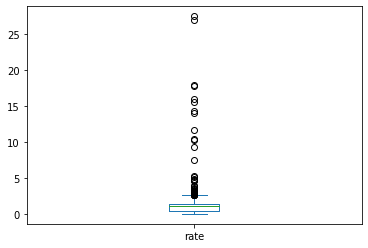

In [678]:
df_features3['rate'].plot(kind='box')

In [682]:
df_out3 = df_features3[df_features3['rate'] < 1.5]  
df_out3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 15288
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credito               13133 non-null  int64  
 1   nombre_conyuge        13133 non-null  object 
 2   nombre_garante        13133 non-null  object 
 3   dias_atraso           13133 non-null  int64  
 4   monto                 13133 non-null  int64  
 5   nro_cuotas_atrasadas  13133 non-null  int64  
 6   cuotas_canceladas     13133 non-null  int64  
 7   cuotas_vencidas       13133 non-null  int64  
 8   vigente               13133 non-null  int64  
 9   TotalCancelado        13133 non-null  int64  
 10  SaldoFindeMes         13133 non-null  float64
 11  rate                  13133 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 1.3+ MB


<AxesSubplot:>

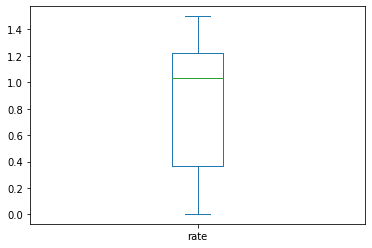

In [683]:
df_out3['rate'].plot(kind='box')

## Exploratory Data Analysis

/tmp/ipykernel_769/783989240.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



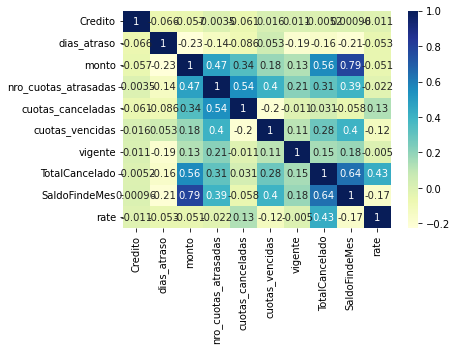

In [684]:
import seaborn as sns
dataplot = sns.heatmap(df_out3.corr(), cmap="YlGnBu", annot=True)


In [685]:
df_atraso_rate = df_out3[['dias_atraso','rate']]
df_atraso_rate.head()

,dias_atraso,rate
0,3157,0.913823
1,2117,0.447365
4,2449,0.161631
6,2148,0.462452
7,2028,0.892272


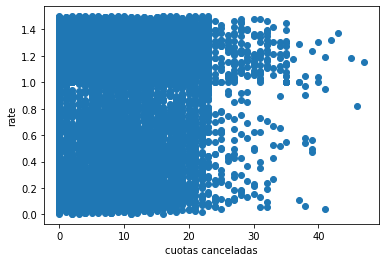

In [686]:
import matplotlib.pyplot as plt

# Plot dias atraso vs rate
plt.scatter(df_out3['cuotas_canceladas'], df_out3['rate'])

# Labels
plt.xlabel("cuotas canceladas")
plt.ylabel("rate")

plt.show()

In [687]:
 df_out3['cuotas_canceladas'].describe()

count    13133.000000
mean        10.227823
std          6.744964
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         47.000000
Name: cuotas_canceladas, dtype: float64

## Model

In [688]:
df_out3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 15288
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credito               13133 non-null  int64  
 1   nombre_conyuge        13133 non-null  object 
 2   nombre_garante        13133 non-null  object 
 3   dias_atraso           13133 non-null  int64  
 4   monto                 13133 non-null  int64  
 5   nro_cuotas_atrasadas  13133 non-null  int64  
 6   cuotas_canceladas     13133 non-null  int64  
 7   cuotas_vencidas       13133 non-null  int64  
 8   vigente               13133 non-null  int64  
 9   TotalCancelado        13133 non-null  int64  
 10  SaldoFindeMes         13133 non-null  float64
 11  rate                  13133 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 1.3+ MB


In [689]:
df_out3.head()

,Credito,nombre_conyuge,nombre_garante,dias_atraso,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado,SaldoFindeMes,rate
0,101104101421,Casado,No,3157,820000,12,9,3,0,695000,760541.0,0.913823
1,101111013583,Casado,No,2117,1038863,24,8,6,1,320000,715299.0,0.447365
4,101111016438,Casado,No,2449,2030000,15,9,6,0,150000,928039.0,0.161631
6,101121024440,Casado,No,2148,1200000,12,10,2,0,109000,235700.0,0.462452
7,101121025332,Casado,No,2028,1530000,14,13,1,0,245000,274580.0,0.892272


In [690]:
df_out3.columns

Index(['Credito', 'nombre_conyuge', 'nombre_garante', 'dias_atraso', 'monto',
       'nro_cuotas_atrasadas', 'cuotas_canceladas', 'cuotas_vencidas',
       'vigente', 'TotalCancelado', 'SaldoFindeMes', 'rate'],
      dtype='object')

In [691]:
df_out3.nunique()

Credito                 13133
nombre_conyuge              2
nombre_garante              2
dias_atraso              1829
monto                    5283
nro_cuotas_atrasadas       42
cuotas_canceladas          47
cuotas_vencidas            44
vigente                     2
TotalCancelado           5704
SaldoFindeMes           12381
rate                    12967
dtype: int64

### Split Train and Test sets

Define X and y

In [692]:
X = df_out3.drop(columns=['rate','TotalCancelado','SaldoFindeMes'])
y = df_out3['rate']

In [693]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [694]:
X_train.shape

(9193, 9)

#### Numerical Features

In [695]:
feat_pre = X_train.drop(columns='Credito')
feat_numerical_names = feat_pre.select_dtypes(include=['int64','float64']).nunique()
feat_numerical_names = feat_numerical_names.index.values
feat_numerical_names

array(['dias_atraso', 'monto', 'nro_cuotas_atrasadas',
       'cuotas_canceladas', 'cuotas_vencidas', 'vigente'], dtype=object)

#### Categorical Features

In [696]:
feat_categorical_nunique = X_train.select_dtypes(include=['object']).nunique()
feat_categorical_nunique

nombre_conyuge    2
nombre_garante    2
dtype: int64

In [697]:
features_cat = feat_categorical_nunique.index.values
features_cat

array(['nombre_conyuge', 'nombre_garante'], dtype=object)

### Baseline Pipe

In [698]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_union, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config; set_config(display='diagram')
from sklearn.tree import DecisionTreeClassifier

In [699]:
# Encode categorical values
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
     ])

# Scale numerical values: 
num_transformer = Pipeline([
    ('scaler', MinMaxScaler()),
])

# Parallelize "num_transformer" and "cat_transfomer"
prepoc_baseline = ColumnTransformer([
    ('num_tr', num_transformer, feat_numerical_names),
    ('cat_tr', cat_transformer, features_cat)],
    remainder='drop'
)

prepoc_baseline

ColumnTransformer(transformers=[('num_tr',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 array(['dias_atraso', 'monto', 'nro_cuotas_atrasadas',
       'cuotas_canceladas', 'cuotas_vencidas', 'vigente'], dtype=object)),
                                ('cat_tr',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 array(['nombre_conyuge', 'nombre_garante'], dtype=object))])

In [700]:
X_transformed = prepoc_baseline.fit_transform(X_train)
X_transformed

array([[0.03418958, 0.11492832, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.2301013 , 0.04196982, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.06078148, 0.08907755, 0.1       , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.0524602 , 0.06138087, 0.3       , ..., 0.        , 1.        ,
        0.        ],
       [0.15502894, 0.03349453, 0.26666667, ..., 0.        , 1.        ,
        0.        ],
       [0.00434153, 0.09849344, 0.4       , ..., 1.        , 0.        ,
        1.        ]])

In [701]:
display(pd.DataFrame(X_transformed))


,0,1,2,3,4,5,6,7,8,9
0,0.034190,0.114928,0.400000,0.361702,0.145833,0.0,1.0,0.0,1.0,0.0
1,0.230101,0.041970,0.400000,0.148936,0.354167,0.0,1.0,0.0,0.0,1.0
2,0.060781,0.089078,0.100000,0.042553,0.062500,1.0,0.0,1.0,0.0,1.0
3,0.178003,0.128403,0.166667,0.000000,0.208333,0.0,0.0,1.0,0.0,1.0
4,0.073263,0.169144,0.200000,0.170213,0.083333,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9188,0.286360,0.029538,0.200000,0.170213,0.083333,0.0,0.0,1.0,0.0,1.0
9189,0.143813,0.072776,0.400000,0.382979,0.125000,0.0,0.0,1.0,1.0,0.0
9190,0.052460,0.061381,0.300000,0.106383,0.208333,1.0,1.0,0.0,1.0,0.0
9191,0.155029,0.033495,0.266667,0.276596,0.062500,0.0,1.0,0.0,1.0,0.0


In [702]:
shape_preproc_baseline = X_transformed.shape
shape_preproc_baseline

(9193, 10)

### Adding estimators

Based on the literature review (https://www.researchgate.net/publication/342467001_Forecasting_recovery_rates_on_non-performing_loans_with_machine_learning)
        
We will try using the 3 best estimators for the task at hand and test them to see which one gives better results.

#### Gradient Boosting Regressor

In [703]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


pipe_baseline = make_pipeline(prepoc_baseline, GradientBoostingRegressor(n_estimators=100, verbose=0))

pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  array(['dias_atraso', 'monto', 'nro_cuotas_atrasadas',
       'cuotas_canceladas', 'cuotas_vencidas', 'vigente'], dtype=object)),
                                                 ('cat_tr',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['nombre_conyuge', 'nombre_garante'], dtype=object))])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

#### Extreme Gradient Tree Boosting

In [704]:
from xgboost import XGBRegressor

pipe_baseline2 = make_pipeline(prepoc_baseline, XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1))
pipe_baseline2


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  array(['dias_atraso', 'monto', 'nro_cuotas_atrasadas',
       'cuotas_canceladas', 'cuotas_vencidas', 'vigente'], dtype=object)),
                                                 ('cat_tr',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['nombre_conyuge', 'nombre_...
                              interaction_constraints=None, learning_rate=0.1,
                              max_delta_step=None, max_depth=10,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

#### Random Forest Regressor 

In [705]:
from sklearn.ensemble import RandomForestRegressor

pipe_baseline3 = make_pipeline(prepoc_baseline, RandomForestRegressor(n_estimators=100))
pipe_baseline3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  array(['dias_atraso', 'monto', 'nro_cuotas_atrasadas',
       'cuotas_canceladas', 'cuotas_vencidas', 'vigente'], dtype=object)),
                                                 ('cat_tr',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['nombre_conyuge', 'nombre_garante'], dtype=object))])),
                ('randomforestregressor', RandomForestRegressor())])

### Cross-Validation

In [706]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_squared_log_error


rmsle = make_scorer(mean_squared_log_error,squared=False)
rmsle

make_scorer(mean_squared_log_error, squared=False)

In [707]:
rmsle_neg = make_scorer(mean_squared_log_error,squared=False,greater_is_better=False)


In [708]:
X_transformed =pd.DataFrame(X_transformed)


In [709]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

score_baseline = cross_val_score(pipe_baseline, X_train, y_train, cv=5, scoring=rmsle).mean()
score_baseline

0.2650310469697699

In [710]:
score_baseline2 = cross_val_score(pipe_baseline2, X_train, y_train, cv=5, scoring=rmsle).mean()
score_baseline2

0.2775116522451355

In [711]:
score_baseline3 = cross_val_score(pipe_baseline3, X_train, y_train, cv=5, scoring=rmsle).mean()
score_baseline3

0.2747966505945331

Gradient Boosting proves better than Random Forest and XBGR. 

#### Predict baseline


In [712]:
X_test

,Credito,nombre_conyuge,nombre_garante,dias_atraso,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente
14186,810171011686,Casado,No,287,1095000,15,6,9,0
2754,203141042347,Soltero,No,985,2200000,24,21,3,0
10557,648161007515,Casado,No,533,1140060,14,11,3,0
11029,658181006983,Soltero,No,461,4267480,8,3,5,0
1036,109181033263,Casado,No,167,1300000,4,2,2,0
...,...,...,...,...,...,...,...,...,...
887,107171071219,Casado,No,145,1150000,12,10,2,0
9362,623171013332,Soltero,No,205,1050000,12,9,3,0
10483,647131001637,Soltero,Si,1735,2057650,18,8,10,0
5301,402141050665,Soltero,No,1434,800000,10,6,4,0


In [713]:
pipe_baseline.fit(X_train,y_train)
y_pred_baseline = pipe_baseline.predict(X_test)
y_pred_baseline

array([0.87946006, 0.84472249, 1.05426292, ..., 0.8300004 , 0.65136532,
       0.32960041])

In [714]:
y_pred_baseline.shape

(3940,)

In [715]:
X_test.Credito.reset_index(drop=True, inplace=True)

In [716]:
submission_baseline = pd.concat([X_test['Credito'], 
                     pd.Series(y_pred_baseline, 
                               name="rate")], 
                    axis=1)
submission_baseline

,Credito,rate
0,810171011686,0.879460
1,203141042347,0.844722
2,648161007515,1.054263
3,658181006983,0.696153
4,109181033263,0.959952
...,...,...
3935,107171071219,1.081688
3936,623171013332,1.006937
3937,647131001637,0.830000
3938,402141050665,0.651365


In [717]:
df_final = submission_baseline

## Forecasting Rate of Recovery

Sorted list by loan id with their rate of recovery forecast.

In [725]:
df_sorted = df_final.sort_values(by=['rate'],ascending=True)
df_sorted.head(20)

,Credito,rate
1054,107201083664,0.119286
2223,201201018267,0.215419
1333,201201014848,0.231080
2577,208161052472,0.244925
3574,220211011399,0.294589
2210,302161097923,0.327799
3939,404181020034,0.329600
1940,623201018376,0.343598
2547,610191013178,0.343854
706,307201015147,0.347262


### Loan Selector  (Buscador de Credito)

In [726]:
df_out3.loc[df_out3['Credito'] ==107201083664]

,Credito,nombre_conyuge,nombre_garante,dias_atraso,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado,SaldoFindeMes,rate
914,107201083664,Soltero,No,440,12387022,60,0,15,0,797966,12387022.0,0.06442


In [727]:
df_pagos.loc[df_pagos['Credito'] ==107201083664]

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,MORA,PAGOSOTROS,TotalCancelado,VRgoech,CONDCAPITAL,CONDINTERES,CONDMORA,DiasMoraPago,Reverso,Concepto
95608,2022-05,0,PIEDECUESTA CENTRO,107201083664,castigado,12387022.0,440,12329419,441,2022-05-02,...,0,54084,797966,743882,0,0,300957,442,NO,0


#### Class Feature Importance

In [723]:
import numpy as np  
import pandas as pd  
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted
import plotly.express as px


class FeatureImportance:

    """
    
    Extract & Plot the Feature Names & Importance Values from a Scikit-Learn Pipeline.
    
    The input is a Pipeline that starts with a ColumnTransformer & ends with a regression or classification model. 
    As intermediate steps, the Pipeline can have any number or no instances from sklearn.feature_selection.

    Note: 
    If the ColumnTransformer contains Pipelines and if one of the transformers in the Pipeline is adding completely new columns, 
    it must come last in the pipeline. For example, OneHotEncoder, MissingIndicator & SimpleImputer(add_indicator=True) add columns 
    to the dataset that didn't exist before, so there should come last in the Pipeline.
    
    
    Parameters
    ----------
    pipeline : a Scikit-learn Pipeline class where the a ColumnTransformer is the first element and model estimator is the last element
    verbose : a boolean. Whether to print all of the diagnostics. Default is False.
    
    Attributes
    __________
    column_transformer_features :  A list of the feature names created by the ColumnTransformer prior to any selectors being applied
    transformer_list : A list of the transformer names that correspond with the `column_transformer_features` attribute
    discarded_features : A list of the features names that were not selected by a sklearn.feature_selection instance.
    discarding_selectors : A list of the selector names corresponding with the `discarded_features` attribute
    feature_importance :  A Pandas Series containing the feature importance values and feature names as the index.    
    plot_importances_df : A Pandas DataFrame containing the subset of features and values that are actually displaced in the plot. 
    feature_info_df : A Pandas DataFrame that aggregates the other attributes. The index is column_transformer_features. The transformer column contains the transformer_list.
        value contains the feature_importance values. discarding_selector contains discarding_selectors & is_retained is a Boolean indicating whether the feature was retained.
    
    
    
    """
    def __init__(self, pipeline, verbose=False):
        self.pipeline = pipeline
        self.verbose = verbose


    def get_feature_names(self, verbose=None):  

        """

        Get the column names from the a ColumnTransformer containing transformers & pipelines

        Parameters
        ----------
        verbose : a boolean indicating whether to print summaries. 
            default = False


        Returns
        -------
        a list of the correct feature names

        Note: 
        If the ColumnTransformer contains Pipelines and if one of the transformers in the Pipeline is adding completely new columns, 
        it must come last in the pipeline. For example, OneHotEncoder, MissingIndicator & SimpleImputer(add_indicator=True) add columns 
        to the dataset that didn't exist before, so there should come last in the Pipeline.

        Inspiration: https://github.com/scikit-learn/scikit-learn/issues/12525 

        """

        if verbose is None:
            verbose = self.verbose
            
        if verbose: print('''\n\n---------\nRunning get_feature_names\n---------\n''')
        
        column_transformer = self.pipeline[0]        
        assert isinstance(column_transformer, ColumnTransformer), "Input isn't a ColumnTransformer"
        check_is_fitted(column_transformer)

        new_feature_names, transformer_list = [], []

        for i, transformer_item in enumerate(column_transformer.transformers_): 
            
            transformer_name, transformer, orig_feature_names = transformer_item
            orig_feature_names = list(orig_feature_names)
            
            if verbose: 
                print('\n\n', i, '. Transformer/Pipeline: ', transformer_name, ',', 
                      transformer.__class__.__name__, '\n')
                print('\tn_orig_feature_names:', len(orig_feature_names))

            if transformer == 'drop':
                    
                continue
                
            if isinstance(transformer, Pipeline):
                # if pipeline, get the last transformer in the Pipeline
                transformer = transformer.steps[-1][1]

            if hasattr(transformer, 'get_feature_names'):

                if 'input_features' in transformer.get_feature_names.__code__.co_varnames:

                    names = list(transformer.get_feature_names(orig_feature_names))

                else:

                    names = list(transformer.get_feature_names())

            elif hasattr(transformer,'indicator_') and transformer.add_indicator:
                # is this transformer one of the imputers & did it call the MissingIndicator?

                missing_indicator_indices = transformer.indicator_.features_
                missing_indicators = [orig_feature_names[idx] + '_missing_flag'\
                                      for idx in missing_indicator_indices]
                names = orig_feature_names + missing_indicators

            elif hasattr(transformer,'features_'):
                # is this a MissingIndicator class? 
                missing_indicator_indices = transformer.features_
                missing_indicators = [orig_feature_names[idx] + '_missing_flag'\
                                      for idx in missing_indicator_indices]

            else:

                names = orig_feature_names

            if verbose: 
                print('\tn_new_features:', len(names))
                print('\tnew_features:\n', names)

            new_feature_names.extend(names)
            transformer_list.extend([transformer_name] * len(names))
        
        self.transformer_list, self.column_transformer_features = transformer_list,\
                                                                    new_feature_names

        return new_feature_names

    
    def get_selected_features(self, verbose=None):
        """

        Get the Feature Names that were retained after Feature Selection (sklearn.feature_selection)

        Parameters
        ----------
        verbose : a boolean indicating whether to print summaries. default = False

        Returns
        -------
        a list of the selected feature names


        """

        if verbose is None:
            verbose = self.verbose

        assert isinstance(self.pipeline, Pipeline), "Input isn't a Pipeline"

        features = self.get_feature_names()
        
        if verbose: print('\n\n---------\nRunning get_selected_features\n---------\n')
            
        all_discarded_features, discarding_selectors = [], []

        for i, step_item in enumerate(self.pipeline.steps[:]):
            
            step_name, step = step_item

            if hasattr(step, 'get_support'):

                if verbose: print('\nStep ', i, ": ", step_name, ',', 
                                  step.__class__.__name__, '\n')
                    
                check_is_fitted(step)

                feature_mask_dict = dict(zip(features, step.get_support()))
                
                features = [feature for feature, is_retained in feature_mask_dict.items()\
                            if is_retained]
                                         
                discarded_features = [feature for feature, is_retained in feature_mask_dict.items()\
                                      if not is_retained]
                
                all_discarded_features.extend(discarded_features)
                discarding_selectors.extend([step_name] * len(discarded_features))
                
                
                if verbose: 
                    print(f'\t{len(features)} retained, {len(discarded_features)} discarded')
                    if len(discarded_features) > 0:
                        print('\n\tdiscarded_features:\n\n', discarded_features)

        self.discarded_features, self.discarding_selectors = all_discarded_features,\
                                                                discarding_selectors
        
        return features

    def get_feature_importance(self):
        
        """
        Creates a Pandas Series where values are the feature importance values from the model and feature names are set as the index. 
        
        This Series is stored in the `feature_importance` attribute.

        Returns
        -------
        A pandas Series containing the feature importance values and feature names as the index.
        
        """
        
        assert isinstance(self.pipeline, Pipeline), "Input isn't a Pipeline"

        features = self.get_selected_features()
             
        assert hasattr(self.pipeline[-1], 'feature_importances_'),\
            "The last element in the pipeline isn't an estimator with a feature_importances_ attribute"
        
        importance_values = self.pipeline[-1].feature_importances_
        
        assert len(features) == len(importance_values),\
            "The number of feature names & importance values doesn't match"
        
        feature_importance = pd.Series(importance_values, index=features)
        self.feature_importance = feature_importance
        
        # create feature_info_df
        column_transformer_df =\
            pd.DataFrame(dict(transformer=self.transformer_list),
                         index=self.column_transformer_features)

        discarded_features_df =\
            pd.DataFrame(dict(discarding_selector=self.discarding_selectors),
                         index=self.discarded_features)

        importance_df = self.feature_importance.rename('value').to_frame()

        self.feature_info_df = \
            column_transformer_df\
            .join([importance_df, discarded_features_df])\
            .assign(is_retained = lambda df: ~df.value.isna())        


        return feature_importance
        
    
    def plot(self, top_n_features=100, rank_features=True, max_scale=True, 
             display_imp_values=True, display_imp_value_decimals=1,
             height_per_feature=25, orientation='h', width=750, height=None, 
             str_pad_width=15, yaxes_tickfont_family='Courier New', 
             yaxes_tickfont_size=15):
        """

        Plot the Feature Names & Importances 


        Parameters
        ----------

        top_n_features : the number of features to plot, default is 100
        rank_features : whether to rank the features with integers, default is True
        max_scale : Should the importance values be scaled by the maximum value & mulitplied by 100?  Default is True.
        display_imp_values : Should the importance values be displayed? Default is True.
        display_imp_value_decimals : If display_imp_values is True, how many decimal places should be displayed. Default is 1.
        height_per_feature : if height is None, the plot height is calculated by top_n_features * height_per_feature. 
        This allows all the features enough space to be displayed
        orientation : the plot orientation, 'h' (default) or 'v'
        width :  the width of the plot, default is 500
        height : the height of the plot, the default is top_n_features * height_per_feature
        str_pad_width : When rank_features=True, this number of spaces to add between the rank integer and feature name. 
            This will enable the rank integers to line up with each other for easier reading. 
            Default is 15. If you have long feature names, you can increase this number to make the integers line up more.
            It can also be set to 0.
        yaxes_tickfont_family : the font for the feature names. Default is Courier New.
        yaxes_tickfont_size : the font size for the feature names. Default is 15.

        Returns
        -------
        plot

        """
        if height is None:
            height = top_n_features * height_per_feature
            
        # prep the data
        
        all_importances = self.get_feature_importance()
        n_all_importances = len(all_importances)
        
        plot_importances_df =\
            all_importances\
            .nlargest(top_n_features)\
            .sort_values()\
            .to_frame('value')\
            .rename_axis('feature')\
            .reset_index()
                
        if max_scale:
            plot_importances_df['value'] = \
                                plot_importances_df.value.abs() /\
                                plot_importances_df.value.abs().max() * 100
            
        self.plot_importances_df = plot_importances_df.copy()
        
        if len(all_importances) < top_n_features:
            title_text = 'All Feature Importances'
        else:
            title_text = f'Top {top_n_features} (of {n_all_importances}) Feature Importances'       
        
        if rank_features:
            padded_features = \
                plot_importances_df.feature\
                .str.pad(width=str_pad_width)\
                .values
            
            ranked_features =\
                plot_importances_df.index\
                .to_series()\
                .sort_values(ascending=False)\
                .add(1)\
                .astype(str)\
                .str.cat(padded_features, sep='. ')\
                .values

            plot_importances_df['feature'] = ranked_features
        
        if display_imp_values:
            text = plot_importances_df.value.round(display_imp_value_decimals)
        else:
            text = None

        # create the plot 
        
        fig = px.bar(plot_importances_df, 
                     x='value', 
                     y='feature',
                     orientation=orientation, 
                     width=width, 
                     height=height,
                     text=text)
        fig.update_layout(title_text=title_text, title_x=0.5) 
        fig.update(layout_showlegend=False)
        fig.update_yaxes(tickfont=dict(family=yaxes_tickfont_family, 
                                       size=yaxes_tickfont_size),
                         title='')
        fig.show()

### Feature Importance

In [724]:

feature_importance = FeatureImportance(pipe_baseline)
feature_importance.plot(top_n_features=25)

/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



###### Code Tests

In [ ]:
model = GradientBoostingRegressor()
cross_validate(model, X_train, y_test, cv = 5)

In [555]:
model = GradientBoostingRegressor()
model.fit(X_transformed, y_train)
# feature importance
print(model.feature_importances_)


[0.12145103 0.08340243 0.05080577 0.40709578 0.30602226 0.0125019
 0.00150969 0.00052677 0.00534452 0.01133986]


In [569]:
X_transformed

,0,1,2,3,4,5,6,7,8,9
0,0.067113,0.197405,0.40,0.190476,0.270833,1.0,1.0,0.0,1.0,0.0
1,0.042149,0.056103,0.40,0.428571,0.125000,0.0,0.0,1.0,0.0,1.0
2,0.116860,0.028997,0.10,0.095238,0.041667,0.0,1.0,0.0,1.0,0.0
3,0.058792,0.593508,0.75,0.428571,0.229167,1.0,1.0,0.0,0.0,1.0
4,0.477026,0.072422,0.40,0.071429,0.437500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10189,0.024602,0.070233,0.40,0.071429,0.104167,0.0,0.0,1.0,1.0,0.0
10190,0.033466,0.466438,0.40,0.000000,0.145833,0.0,0.0,1.0,1.0,0.0
10191,0.095695,0.084363,0.40,0.476190,0.083333,0.0,1.0,0.0,1.0,0.0
10192,0.067836,0.005800,0.00,0.023810,0.270833,0.0,1.0,0.0,1.0,0.0


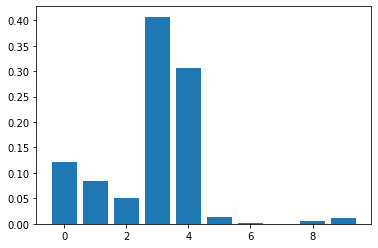

In [576]:
import matplotlib.pyplot as plt
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

[0.12145103 0.08340243 0.05080577 0.40709578 0.30602226 0.0125019
 0.00150969 0.00052677 0.00534452 0.01133986]


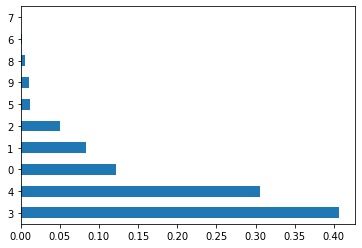

In [567]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_transformed.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])

In [577]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
pyplot.show()

ValueError: tree must be Booster, XGBModel or dict instance

AttributeError: 'GradientBoostingRegressor' object has no attribute 'feature_names'

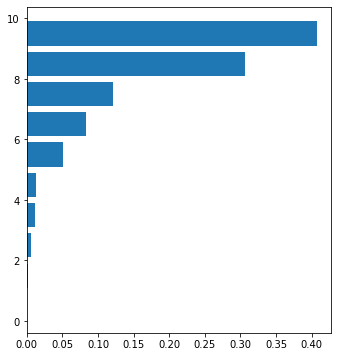

In [581]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(model.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")